## 01MIAR - Actividad Whitepapers

- Alumno: Julio Emanuel Suriano Bryk
- Fecha de entrega: 20/06/2024
- Paper elegido: [PyTorch: An Imperative Style, High-Performance Deep Learning Library](https://arxiv.org/abs/1912.01703)
- Fecha de publicación del paper: 3 Diciembre 2019


#### Análisis del Paper: "PyTorch: An Imperative Style, High-Performance Deep Learning Library"

**Autores:**

- Adam Paszke (University of Warsaw)
- Sam Gross (Facebook AI Research)
- Francisco Massa (Facebook AI Research)
- Adam Lerer (Facebook AI Research)
- James Bradbury (Google)
- Gregory Chanan (Facebook AI Research)
- Trevor Killeen (Self Employed)
- Zeming Lin (Facebook AI Research)
- Natalia Gimelshein (NVIDIA)
- Luca Antiga (Orobix)
- Alban Desmaison (Oxford University)
- Andreas Köpf (Xamla)
- Edward Yang (Facebook AI Research)
- Zach DeVito (Facebook AI Research)
- Martin Raison (Nabla)
- Alykhan Tejani (Twitter)
- Sasank Chilamkurthy (Qure.ai)
- Benoit Steiner (Facebook AI Research)
- Lu Fang (Facebook)
- Junjie Bai (Facebook)
- Soumith Chintala (Facebook AI Research)


### Resumen

El paper presenta PyTorch, una biblioteca de [_deep learning_](https://es.wikipedia.org/wiki/Aprendizaje_profundo) que permite hacer cálculos matemáticos de forma rápida y flexible, aprovechando el poder de las GPUs, en un estilo de [programación imperativo](https://en.wikipedia.org/wiki/Imperative_programming) y [Pythonico](https://blog.startifact.com/posts/what-is-pythonic/).

A diferencia de otros _frameworks_ que usan grafos de flujo de datos estáticos ([comparación con TensorFlow](https://www.synapse-analytics.io/post/dynamic-vs-static-computational-graphs-pytorch-or-tensorflow)), PyTorch permite la ejecución inmediata de cálculos tensoriales, lo que mejora la flexibilidad y la facilidad de debugging. La misma está diseñado para ser fácil de usar y eficiente, permitiendo a los investigadores experimentar rápidamente con nuevos modelos y técnicas.


### Principios de Diseño

Los cuatro principios principales que guían el diseño de PyTorch son:

1. **Ser Pythonico:** Integración natural con el ecosistema Python, como pueden ser las librerías de plotting y de data processing.

2. **Priorizar a los investigadores:** Simplificar la escritura de modelos, data loader y optimizadores. PyTorch se encarga de abstraer la complejidad de Machine Learning con APIs intuitivas y libre de _side effects_.

3. **Rendimiento pragmático:** Balance entre simplicidad y eficiencia, donde si se quiere obtener una mejora en la performance es posible a coste de complejidad del código.

4. **Peor es mejor:** Las implementaciones internas de la librería son relativamente simples a modo de que el código sea más flexible y fácil de mantener por el equipo de desarrollo y la comunidad _Open Source_.


### Arquitectura de PyTorch

PyTorch se centra en implementaciones de alto rendimiento para ejecutar algoritmos de _deep learning_ de manera eficiente desde un intérprete de Python, superando desafíos como el [Global Interpreter Lock](https://wiki.python.org/moin/GlobalInterpreterLock) (GIL). A diferencia de otros frameworks que usan gráficos de flujo de datos estáticos, PyTorch optimiza su ejecución mediante un núcleo eficiente en C++, [libtorch](https://github.com/pytorch/pytorch/blob/main/docs/libtorch.rst), que incluye estructuras tensoriales, operadores para GPU y CPU, y primitivas de paralelismo que permiten ejecutar modelos PyTorch sin necesidad del GIL.

PyTorch mantiene una separación estricta entre el flujo de control (manejo de ramas y bucles) y el flujo de datos (tensores y operaciones sobre ellos), lo cual optimiza la ejecución en CPU y GPU de manera asíncrona, aprovechando mecanismos como los flujos CUDA para mejorar el rendimiento incluso en un lenguaje interpretado como Python.

El framework utiliza un [allocator](https://pytorch.org/docs/stable/notes/cuda.html#memory-management) personalizado para gestionar la asignación de memoria dinámica en GPU, evitando bloqueos gracias a un cacheo inteligente de memoria CUDA. Esta estrategia se optimiza para los patrones de uso de memoria en deep learning, mejorando la interoperabilidad y el rendimiento general. Para gestionar eficientemente la memoria escasa de GPU, PyTorch implementa un esquema de conteo de referencias, liberando la memoria subyacente inmediatamente cuando los tensores ya no son necesarios.

Además, PyTorch extiende el módulo estándar de [multiprocessing](https://docs.python.org/3/library/multiprocessing.html#module-multiprocessing) de Python con [torch.multiprocessing](https://pytorch.org/docs/stable/multiprocessing.html), facilitando la paralelización efectiva de procesos y el manejo de tensores CUDA compartidos, lo cual es crucial para entrenamientos distribuidos y técnicas como [Hogwild](https://people.eecs.berkeley.edu/~brecht/papers/hogwildTR.pdf).


### Implementación de una red neuronal (simple)

El siguiente código crea y entrena una red neuronal simple para clasificación binaria. Donde se generan datos aleatorios, define un modelo con una capa oculta (ReLu) y una capa de salida, utiliza la función de pérdida de [_CrossEntropyLoss_](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) y optimizador Descenso del Gradiente Estocástico ([_SGD_](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)) para el entrenamiento durante 100 épocas. Después del entrenamiento, muestra cómo hacer predicciones con el modelo entrenado en nuevos datos.

```python
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Step 1: prepare sample data
X = np.random.rand(100, 5).astype(np.float32)  # 100 samples with 5 features each
y = np.random.randint(0, 2, size=100)          # Binary labels (0 or 1)

# Convert NumPy arrays to PyTorch tensors
X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y, dtype=torch.long)

# Step 2: Define a model
model = nn.Sequential(
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 2),
)

# Step 3: Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Step 4: Train the model
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Step 5: Generate a random new input to predict label
input_data = torch.tensor(np.random.rand(1, 5).astype(np.float32))

# Step 6: Make predictions
model.eval()
with torch.no_grad():
    output = model(input_data)
    _, predicted = torch.max(output, 1)
    print(f'Predicted class: {predicted.item()}')

```

Cabe destacar que para ejecutar el siguiente código localmente es necesario contar con una GPU instalada en el dispositivo. En caso de no tener una, se puede utilizar el siguiente [link de Google Colab](https://colab.research.google.com/github/EmaSuriano/python-demos/blob/main/deep-learning/demo-pytorch.ipynb) habilitando la opción de utilizar la GPU en el menu de Tipo de Ejecución.


### Adopción

En el paper se muestra un gráfico de Adopción del Framework, pero dado que la publicación del mismo es del 2019 no vi relevante agregar el mismo al análisis. En cambio un posible análisis para entender la adopción de PyTorch es utilizando Gooogle Trends.

Para este caso realice la comparación entre PyTorch y los frameworks que se podrían considerar como competencia: [TensorFlow](https://www.tensorflow.org/) y [Keras](https://keras.io/). Accediendo al siguiente [link](https://trends.google.com/trends/explore?date=all&q=%2Fg%2F11gd3905v1,%2Fg%2F11bwp1s2k3,%2Fg%2F11c1r2rvnp) se puede visualizar información adicional.


In [35]:
# library imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress all FutureWarnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [37]:
# path to remote file stored in Github public repository
repo_path = "https://raw.githubusercontent.com/EmaSuriano/python-demos/main"
ds_path = "submits/python/google_trends.csv"

# Load dataset using pandas
df = pd.read_csv(f"{repo_path}/{ds_path}")
frameworks = ["PyTorch", "TensorFlow", "Keras"]

# clear values from data set
df["Monat"] = pd.to_datetime(df["Monat"], format="%Y-%m")

for f in frameworks:
    df[f] = pd.to_numeric(df[f].apply(lambda value: str(value).replace("<", "")))

display(df)

,Monat,PyTorch,TensorFlow,Keras
0,2004-01-01,0,0,0
1,2004-02-01,0,0,0
2,2004-03-01,0,0,0
3,2004-04-01,0,0,0
4,2004-05-01,0,0,0
...,...,...,...,...
241,2024-02-01,90,48,19
242,2024-03-01,100,52,21
243,2024-04-01,99,54,22
244,2024-05-01,93,46,21


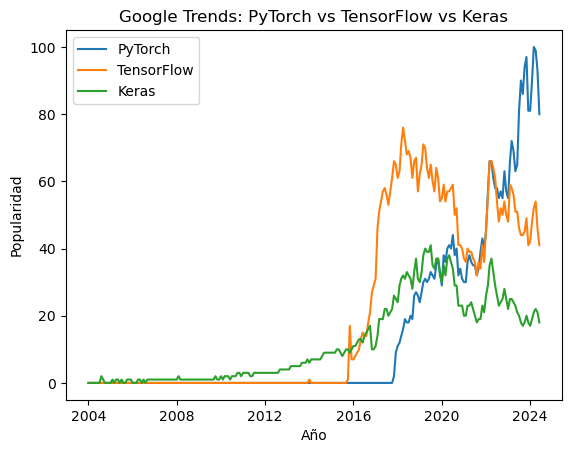

In [36]:
for framework in ["PyTorch", "TensorFlow", "Keras"]:
    sns.lineplot(x="Monat", y=framework, data=df, label=framework)

plt.title("Google Trends: PyTorch vs TensorFlow vs Keras")
plt.xlabel("Año")
plt.ylabel("Popularidad")
plt.show()

Como se puede observar en el gráfico PyTorch ganó una gran cantidad de popularidad especialmente en los últimos años superando a su gran competitor TensorFlow.

Cabe destacar que este análisis de Adopción no representa lo que realmente sucede en la realidad, ya que solo refleja la cantidad de búsquedas que se realizan en Google sobre el framework y temas relaciones sobre el mismo. Para realizar un análisis adecuado se debería obtener información de cuantas redes neuronales se encuentran hoy en dia en producción y hacer la comparación entre los frameworks.

Desafortunadamente obtener este tipo de datos es realmente complicado, ya que normalmente es información privada de las empresas y que no compartirían públicamente por políticas de las mismas. Por lo que Google Trends es la solución mas optima y actualizada hasta el dia de la fecha.


### Conclusiones

PyTorch ha demostrado ser una herramienta poderosa y flexible para la investigación en _deep learning_, combinando la facilidad de uso de Python con un rendimiento eficiente. La capacidad de ejecutar cálculos de manera dinámica y la integración con el ecosistema Python lo hacen una opción popular entre los investigadores y desarrolladores.

Luego de la publicación del paper se observar un gran crecimiento, volviendo uno de los framework más populares. Se podría llegar a decir que evoluciono de una librería de Python a un framework mucho mas potente que cuando se lanzo, contando con una comunidad que se dedican a mejorarlo y hasta realizar conferencias que se centran unicamente en el mismo. Si uno accede al sitio Web, puede encontrar que ya esta planificada [la siguiente conferencia](https://events.linuxfoundation.org/pytorch-conference/) para el 18 de Septiembre del 2024.
